### Importing Libraries

In [1]:
import glob
import random
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from tqdm import tqdm
from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

2025-03-10 12:54:55.661142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-10 12:54:55.661270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-10 12:54:55.811268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


###  Setting and Load Data

In [2]:
train_df = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_df = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')

In [3]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

### Data Understanding

In [4]:
train_df.shape,test_df.shape

((12600, 2), (5400, 1))

In [5]:
train_df.isna().sum(), test_df.isna().sum()

(filename    0
 label       0
 dtype: int64,
 filename    0
 dtype: int64)

In [6]:
train_df.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [7]:
train_df.label.nunique()

15

### Exploratory Data Analysis

In [8]:
import plotly.express as px
HAR = train_df.label.value_counts()
fig = px.pie(train_df, values=HAR.values, names=HAR.index,title="Label Distribution")
fig.show()

In [9]:
filename = train_df['filename']
labels = train_df['label']

In [10]:
def displaying_random():
    num = random.randint(1, 10000)
    image_filename =  f"Image_{num}.jpg"
    img_path = f"../input/human-action-recognition-har-dataset/Human Action Recognition/train/{image_filename}"
    imgg = img.imread(img_path)
    plt.imshow(imgg)
    plt.title("{}".format(train_df.loc[train_df['filename'] == "{}".format(image_filename), 'label'].item()))
    plt.axis('off')
    plt.show()

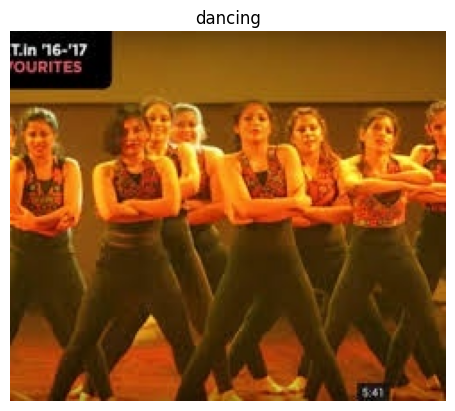

In [11]:
displaying_random()

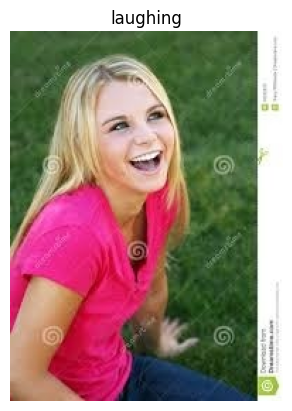

In [12]:
displaying_random()

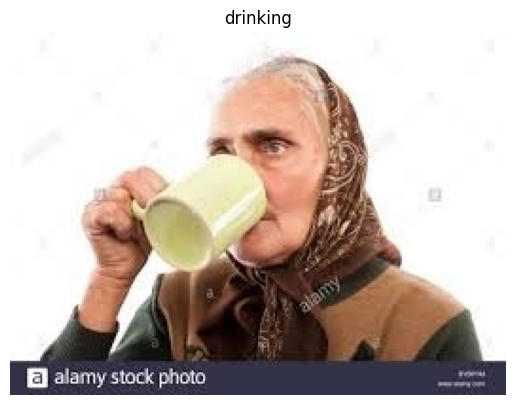

In [13]:
displaying_random()

In [14]:
image_data = []
image_label = []

for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]
    imgg = Image.open(t)
    image_data.append(np.asarray(imgg.resize((160,160))))
    image_label.append(labels[i])

In [15]:
iii = image_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [16]:
y_train = to_categorical(np.asarray(train_df["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Model Creation and Training with Some Models

#### Efficient Net

In [17]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [20]:
history_efficientnet_model = efficientnet_model.fit(iii,y_train,epochs=10)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9761 - loss: 0.0698
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9798 - loss: 0.0628
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9826 - loss: 0.0556
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9822 - loss: 0.0549
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9828 - loss: 0.0592
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9838 - loss: 0.0531
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9802 - loss: 0.0576
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9800 - loss: 0.0589
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9791 - loss: 0.0650
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9845 - loss: 0.0480


In [ ]:
efficientnet_model.save("model.h5")